In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd

# Task 0

In [2]:
month1 = pd.read_csv("mar13_decoded", sep='\t')
month2 = pd.read_csv("apr13_decoded", sep='\t')

# merge datasets into df
df = pd.concat([month1, month2])
df.index+=1
df = df.drop(['NodeID','Socket','Apic','Err Val','Misc'], axis=1)

In [3]:
df.head()

,Date Time,Complete Node,Cabinet,Chassis,Slot,Node,Node Type,Processor,Time,Bank,...,Link,Cache way in error,Syndrome,Core,Errorcode,Ext_errorcode,Error Type,Addr,Addr Desc,Errorcode Type
1,2013-03-04 00:01:06,c22-5c2s5n0,22-5,2.0,5.0,0.0,xe,2:600f12,1.362377e+09,4,...,NaN,NaN,'11011111,NaN,'100000010011,'1000,ECC Error,c25be2780,Physical,bus
2,2013-03-04 00:02:41,c22-6c0s0n3,22-6,0.0,0.0,3.0,xe,2:600f12,1.362377e+09,4,...,NaN,NaN,'1000000000100000,NaN,'101000010011,'1000,ECC Error,83305e6b0,Physical,bus
3,2013-03-04 00:03:37,c22-5c2s5n0,22-5,2.0,5.0,0.0,xe,2:600f12,1.362377e+09,4,...,NaN,NaN,'11011111,NaN,'100000010011,'1000,ECC Error,c25be2780,Physical,bus
4,2013-03-04 00:04:51,c8-9c2s7n0,8-9,2.0,7.0,0.0,xe,2:600f12,1.362377e+09,4,...,NaN,NaN,'1000000000,NaN,'101000010011,'1000,ECC Error,435669be0,Physical,bus
5,2013-03-04 00:07:21,c22-5c2s5n0,22-5,2.0,5.0,0.0,xe,2:600f12,1.362377e+09,4,...,NaN,NaN,'11011111,NaN,'100000010011,'1000,ECC Error,c25be2780,Physical,bus


In [4]:
df.keys()

Index(['Date Time', 'Complete Node', 'Cabinet', 'Chassis', 'Slot', 'Node',
       'Node Type', 'Processor', 'Time', 'Bank', 'OV', 'UC', 'PCC', 'CECC',
       'UECC', 'DEF', 'POISON', 'L3 Subcache', 'Sub Link', 'LDT Link', 'Scrub',
       'Link', 'Cache way in error', 'Syndrome', 'Core', 'Errorcode',
       'Ext_errorcode', 'Error Type', 'Addr', 'Addr Desc', 'Errorcode Type'],
      dtype='object')

In [5]:
df = df[df['Node Type'] != 'service_not_present']
df['datetime'] = pd.to_datetime(df['Time'], unit='s')
# df['datetime'] = df['datetime'].dt.tz_localize('America/Chicago', ambiguous=True)


In [6]:
df = df[(1362117600 < df['Time']) & (df['Time'] < 1367384399)]
print (df.shape)

(310105, 32)


In [7]:
print(min(df['datetime']))
print(max(df['datetime']))

2013-03-04 05:13:23
2013-05-01 04:58:26


#### Total number of entries

In [8]:
len(df)

310105

#### Unique number of nodes

In [9]:
len(df['Complete Node'].unique())

6007

In [10]:
# number of days
# normalize() sets the time to 00:00:00 giving us only the date portion of the timestamp/
len(df['datetime'].dt.normalize().unique())

59

In [11]:
# node types
df['Node Type'].unique()

array(['xe', 'service', 'xk'], dtype=object)

In [12]:
# uncorrectable errors
df_final = df[(df['UC'] ==1)]

df_final

,Date Time,Complete Node,Cabinet,Chassis,Slot,Node,Node Type,Processor,Time,Bank,...,Cache way in error,Syndrome,Core,Errorcode,Ext_errorcode,Error Type,Addr,Addr Desc,Errorcode Type,datetime
103984,2013-03-20 21:20:18,c6-4c0s7n3,6-4,0.0,7.0,3.0,xe,2:600f12,1.363832e+09,0,...,'0,NaN,NaN,'110001001,'10000,Tag Error : Tag Array,c58c01e80,Physical,mem,2013-03-21 02:20:18
156485,2013-03-28 07:15:35,c5-3c0s7n3,5-3,0.0,7.0,3.0,xe,2:600f12,1.364473e+09,0,...,'0,NaN,NaN,'110001001,'10000,Tag Error : Tag Array,a7dff0740,Physical,mem,2013-03-28 12:15:35
24495,2013-04-04 22:08:12,c10-1c1s6n0,10-1,1.0,6.0,0.0,xe,2:600f12,1.365131e+09,0,...,'0,NaN,NaN,'110001001,'10000,Tag Error : Tag Array,6180b1a40,Physical,mem,2013-04-05 03:08:12


In [13]:
mcetype = df[~pd.isnull(df['Errorcode Type'])]
mcetype['Errorcode Type'].unique()

array(['bus', 'mem', 'tlb'], dtype=object)

### Task0.3 Answer: For error, I think it is mainly included software error and it may or may not bring serve consequence to the function. But failure is the result of error in some cases. When an uncorrectable error is consumed, the function will crash and cause a failure.

#### Count the number of MCEs per node. Provide a box plot to summarize your results.
Answer: 6007 complete nodes. Code below with box plot.
We can see there are a lot of outliers and the mean is close to 1, and we total have 6007 complete nodes, there are 4139 nodes only appear once.

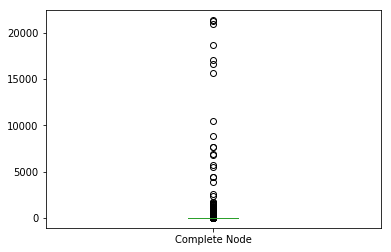

4139


In [14]:
# don't forget to represent this data as a box plot
data = df['Complete Node'].value_counts()

df1 = pd.DataFrame(data,columns=['Complete Node'])
df1.plot.box()
plt.show()
d = 0
for i in range(6007):
    if data[i] == 1:
        d = d +1
print(d)

In [15]:
# 5. Compute the mean time between MCEs for:
# 5.1 All nodes together (the whole dataset)
df_sort=df.sort_values(by=['Time'])
timevals = df_sort['Time'].values
diffs = timevals[1:] - timevals[:-1]
print ("For the whole dataset, the mean time is: "+str(diffs.mean() ))
print ("For the whole dataset, the std is: "+str(diffs.std() ))


# 5.2 Each of the node types (i.e. XE, XK, etc)
list1=df['Node Type'].unique()
for item in list1:
    grouped=df.groupby(['Node Type']).get_group(item)
    grouped_sort=grouped.sort_values(by=['Time'])
    timevals_xe = grouped_sort['Time'].values
    diffs_xe = timevals_xe[1:] - timevals_xe[:-1]
    print ("for "+item+" the mean time is: "+str(diffs_xe.mean() ))
    print ("for "+item+" the std is: "+str(diffs_xe.std() )  )

For the whole dataset, the mean time is: 16.1568473802
For the whole dataset, the std is: 116.51846226
for xe the mean time is: 17.6926225166
for xe the std is: 123.297755414
for service the mean time is: 309.333869372
for service the std is: 1692.8675718
for xk the mean time is: 465.501302568
for xk the std is: 1708.34827746


# Task 1
### Plot the time to MCE distribution. Does this fit any known distribution (e.g., Gaussian, Weibull, Exponential)?

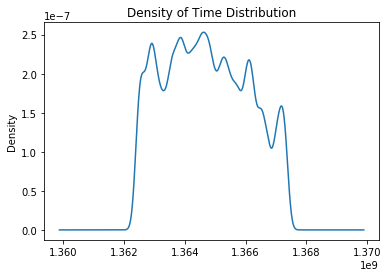

In [16]:
from pandas import Series
df1=df.sort_values(by=['Time'])['Time']
df1.plot(kind='kde',title="Density of Time Distribution")
plt.show()

29478 2013-03-16 03:45:38 2013-03-15 19:34:20
8089 2013-04-18 16:10:13 2013-04-18 13:55:24
21444 2013-04-22 16:25:32 2013-04-22 10:28:08
46795 2013-04-25 02:25:39 2013-04-24 13:25:44


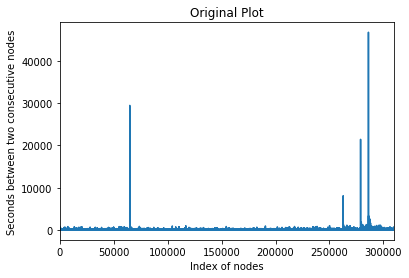

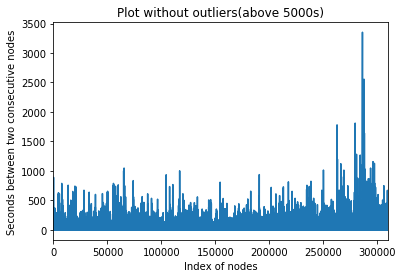

In [17]:
start = ((df['datetime'].sort_values())[:-1])
end = (df['datetime'].sort_values())[1:]
start = list(start)
end= list(end)
dif = []
extra = []

for i in range(len(start)):
    a = ((end[i]-start[i]).seconds)
    dif.append(a)
    extra.append(a)
    if (a > 5000):
        print(a,end[i],start[i])
        extra.pop()


ts = pd.Series(dif)
ts.plot()
plt.ylabel("Seconds between two consecutive nodes")
plt.xlabel("Index of nodes")
plt.title("Original Plot")
plt.show()



after = pd.Series(extra)
after.plot()
plt.ylabel("Seconds between two consecutive nodes")
plt.xlabel("Index of nodes")
plt.title("Plot without outliers(above 5000s)")
plt.show()

### What percentage of MCEs is due to memory errors?

In [18]:
df_task1_2 = df.loc[(df['Errorcode Type'] == "mem")]
mem_err = len(df_task1_2)
total = len(df)
print(mem_err/total)

0.4833072668934716


### Provide a breakdown of the number, type (e.g., ECC, L1, L2, memory) and % of machine check for the entire dataset and per node type.
Construct a bar chart to visualize your results.

D:\Applications\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


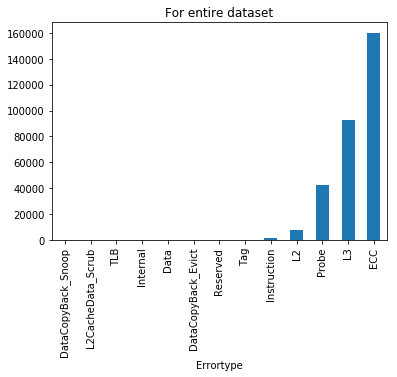

In [19]:
new_errortype=[]
for item in df['Error Type']:
    new_errortype.append(str(item).split()[0])
df['Errortype']=new_errortype

entire_count=df[df['Errortype'] != 'nan'].groupby('Errortype').datetime.agg({'sum':'count'})
entire_count['percentage']=entire_count['sum']/df.shape[0]
x=entire_count['sum'].sort_values()
x.plot(kind='bar',title="For entire dataset")
plt.show()

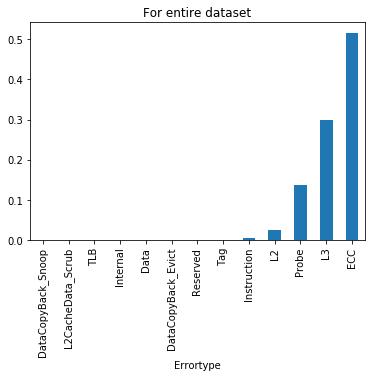

In [20]:
x=entire_count['percentage'].sort_values()
x.plot(kind='bar',title="For entire dataset")
plt.show()

D:\Applications\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


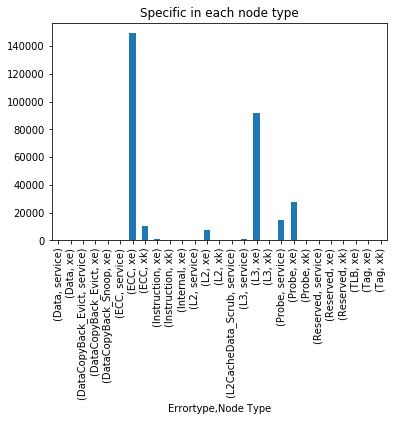

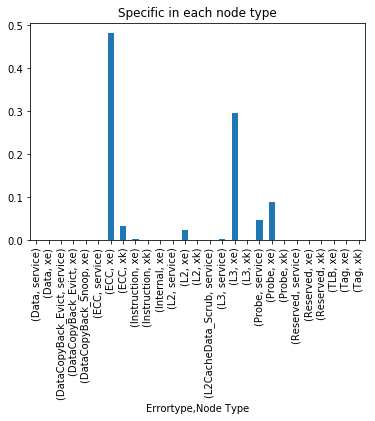

In [21]:
node_count=df[df['Errortype'] != 'nan'].groupby(['Errortype','Node Type']).datetime.agg({'sum':'count'})
# node_counts = node_count.groupby(level=0).apply(lambda x: x / float(x.sum()))
node_count['Ratio']=node_count['sum']/df.shape[0]
x=node_count['sum']
x.plot(kind='bar',title="Specific in each node type")
plt.show()
plt.figure()
x=node_count['Ratio']
x.plot(kind='bar',title="Specific in each node type")
plt.show()

### What is a correctable error, uncorrectable error and deferred error in this dataset?
Answer: 
For this dataset, correctable errors are those CECC=1&UC=0, which have been corrected by hardware and cause no loss of data or corruption of processor state. So when a fetched line has an error only in the same rank and symbol identified by this register, then the error is a correctable chipkill error.  

Uncorrectable error is when a fetched line has an error in the same rank and a different symbol than identified by this register, then there are at least two symbol errors in the line and the error is uncorrectable.Uncorrectable errors immediately result in a Machine Check exception.


Deferred error equals to DEF=1. It is result of an uncorrectable data error which did not immediately cause a processor exceptionwhen. It is hardware partially dealt with the problem via containment.Deferred errors are errors that cannot be corrected by hardware, but do not cause an immediate interruption in program flow, loss of data integrity, or corruption of processor state. These errors indicate that data has been corrupted but not consumed; no exception is generated because the data has not been referenced by a core or an IO link. 

source: https://courses.engr.illinois.edu/ece498dsu/sp2018/docs/mp1/AMD_Manual_XEXK.pdf

### Are there any uncorrectable errors? If yes, provide a histogram for the TBF for uncorrectable errors. Compute a separate MTBF and FIT for uncorrectable errors.

Yes, there are three uncorrectable errors for the given amount of time
The histogram for TBF for uncorrectable errors: 


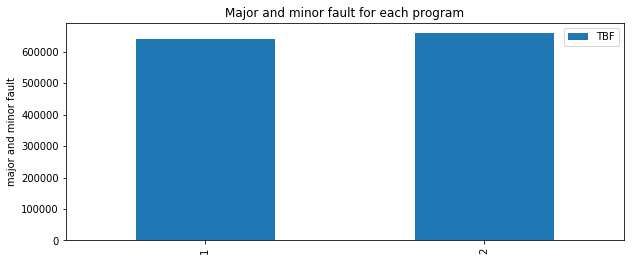

MTBF=180.399166667 hours
FIT(number of failures in 10^9 hours)=2155558


In [22]:
print ("Yes, there are three uncorrectable errors for the given amount of time")
print ("The histogram for TBF for uncorrectable errors: ")

df2=df[df['UC']==1].sort_values(by='Time')

list_time=(df2['Time'].values)[1:] - (df2['Time'].values)[:-1]

dff = pd.DataFrame(list_time,
                 index=[1,2],
                 columns=pd.Index(['TBF']
                 )).round(2)
dff.plot(kind='bar',figsize=(10,4))
plt.ylabel("major and minor fault")
plt.title("Major and minor fault for each program")
plt.show()

print ("MTBF="+str(sum(list_time)/2/3600)+" hours")
total_time=(df['Time'].max()-df['Time'].min())/3600
print ("FIT(number of failures in 10^9 hours)="+str(int((3 * 10**9)/total_time)))

# Task 2

# 1.Provide a breakdown of the memory errors % in Single, dual, triple, quadruple bit errors
Use a table to summarize the data, for all node types (ALL, XE, XK, service)
Use the x8 syndrome table in the AMD processor manual (section 2.13.2.5) to understand how to solve this problem

In [23]:
memdf=(df.loc[df["Error Type"] == "ECC Error"]).copy()


#append the hex form(ep.0x10) to memdf    
memdf['Syndrome_hex']=memdf['Syndrome'].apply(lambda x: ( hex(int((''.join(str(x))[1:]),2))))

#create 4 bit hex number into "hex" column
memdf['hex'] = memdf['Syndrome_hex'].apply(lambda x: ((x.lstrip("0x")).zfill(4)).upper())

x8 = pd.read_table("syndrome_x8.txt", sep=' ', index_col='00')

#build dictionary to contain all the value and row number in table x8
header = list(x8)
ind = list(x8.index)
dic = {}
for j in header:
    for i in range (len(x8[j])):
        dic[(x8[j])[i]] = ind[i]
len(dic.keys())

#check if the syndrome number in table x8
listhex=memdf['hex']
row_num=[]
       
def f(item):
    if (dic.get(item) == None):
        return 0
    return (str(bin(int(dic[item], 16)))[2:]).count("1")
memdf['error_bits'] = memdf['hex'].apply(lambda x: f(x))


values = memdf['error_bits'].value_counts()    

#remove rows with more than 4 error bits
df1234 = memdf[memdf['error_bits'] != 5 ]
df1234 = df1234[df1234['error_bits'] != 6 ]
df1234 = df1234[df1234['error_bits'] != 7 ]
df1234 = df1234[df1234['error_bits'] != 0 ]
df1234 = df1234[df1234['error_bits'] != 8 ]
dfne=df1234[['Node Type','error_bits']]
df_xe = dfne[dfne['Node Type'] == 'xe' ]
dfxe=df_xe.groupby(['error_bits']).count()
df_xk = dfne[dfne['Node Type'] == 'xk' ]
dfxk=df_xk.groupby(['error_bits']).count()
df_se = dfne[dfne['Node Type'] == 'service' ]
dfse=df_se.groupby(['error_bits']).count()
frames = [dfxk,dfxe,dfse]
result = pd.concat(frames,axis=1, join='outer')
result.columns=['xk','xe','service']
result

,xk,xe,service
error_bits,,,
1,5989,141851,407.0
2,3726,3500,1.0
3,544,1649,NaN
4,169,1025,NaN


# 2.How frequent (time) are multiple (>1) bit errors?
Provide one or two charts of your choice to motivate your answer.
Do different types of nodes (XE, XK, service) behave differently in terms of the frequency of multiple bit errors?


[7227, 2193, 1194, 743, 370, 147, 21] [2, 3, 4, 5, 6, 7, 8]


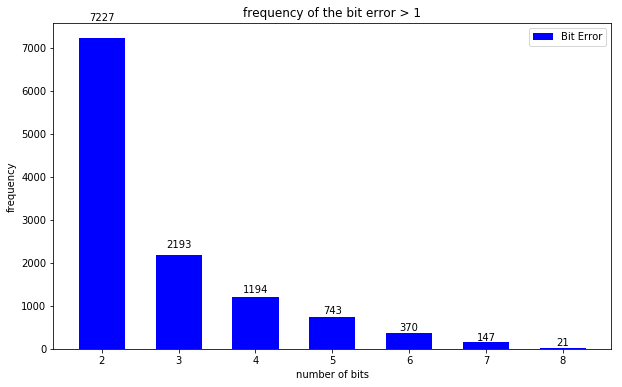

In [24]:
#count ones by change it to string and apply lambda function
myarray = list((values.index).sort_values())
lst = []
for i in range(len(values)):
    lst.append(values[i])

# data cleaning
del(lst[0])
del(lst[0])
del(myarray[0])
del(myarray[0])
print(lst , myarray)

fig, ax = plt.subplots(figsize= (10,6))
rects1 = ax.bar(myarray, lst, 0.6, color='b')
plt.xlabel("number of bits")
plt.ylabel("frequency")
plt.title("frequency of the bit error > 1")
ax.set_xticks(np.asarray(myarray))
ax.legend(['Bit Error'])

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
plt.show()


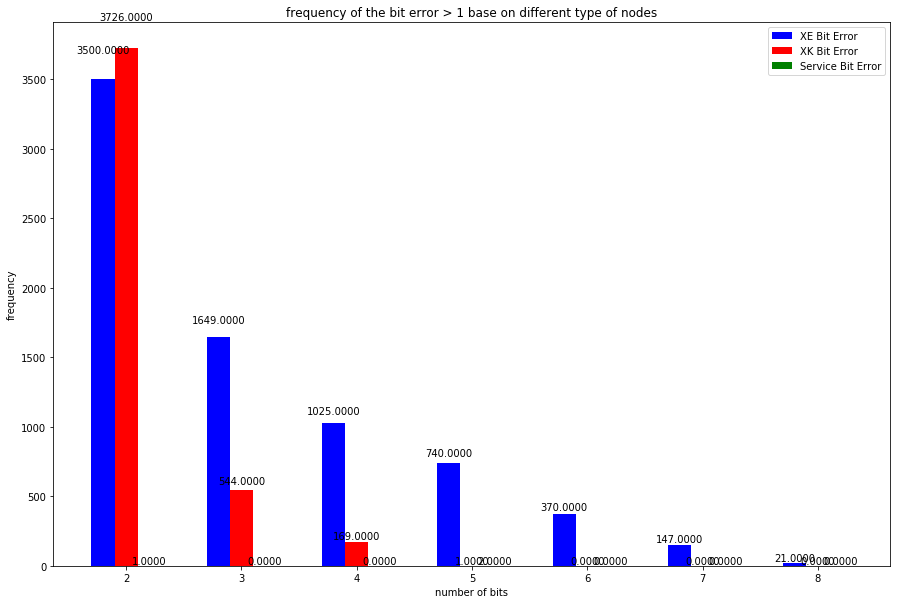

In [25]:
from numpy import linalg as la
#count ones by change it to string and apply lambda function
#df['decode'] = df['Syndrome'].apply(lambda x: str(x).count('1'))
#myarray = list(((df['decode'].value_counts()).index).sort_values())

xe = memdf.loc[memdf['Node Type'] == "xe"]
xk = memdf.loc[memdf['Node Type'] == "xk"]
service = memdf.loc[memdf['Node Type'] == "service"]
xe_values = xe['error_bits'].value_counts()
xk_values = xk['error_bits'].value_counts()
service_values = service['error_bits'].value_counts()
xe_sort = list((xe_values.index).sort_values())
xk_sort = list((xk_values.index).sort_values())
service_sort = list(((service_values).index).sort_values())

lst_xe = []
lst_xk = []
lst_service = []
# print(service_values,service_sort)
# # print(xe)
for i in myarray:
    if i in xe_sort:
        lst_xe.append(xe_values[i])
    else:
        lst_xe.append(0)
    
    if i in xk_sort:
        lst_xk.append(xk_values[i])
    else:
        lst_xk.append(0)
    
    if i in service_sort:
        lst_service.append(service_values[i])
    else:
        lst_service.append(0)
# print(len(lst_xk),len(lst_service),len(lst_xk))

# lst_xe = lst_xe/la.norm(lst_xe)
# lst_xk = lst_xk/la.norm(lst_xk)
# lst_service = lst_service/la.norm(lst_service)

ind = np.arange(2,len(myarray)+2,1)
# print(len(ind))
fig, ax = plt.subplots(figsize= (15,10))
rects1 = ax.bar(ind-0.2, lst_xe, 0.2, color='b')
rects2 = ax.bar(ind, lst_xk, 0.2, color='r')
rects3 = ax.bar(ind+0.2, lst_service, 0.2, color='g')
plt.xlabel("number of bits")
plt.ylabel("frequency")
plt.title("frequency of the bit error > 1 base on different type of nodes")
ax.set_xticks(np.asarray(myarray))
ax.legend(['XE Bit Error','XK Bit Error', 'Service Bit Error'])

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%.4f' % round(float(height),4),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
# ,rects2,rects3)
plt.show()


# 3.Test the following hypothesis: XK nodes perform worse (have a higher rate of memory errors) than XE nodes.
Remember to normalize rates based on memory capacities of these node types.

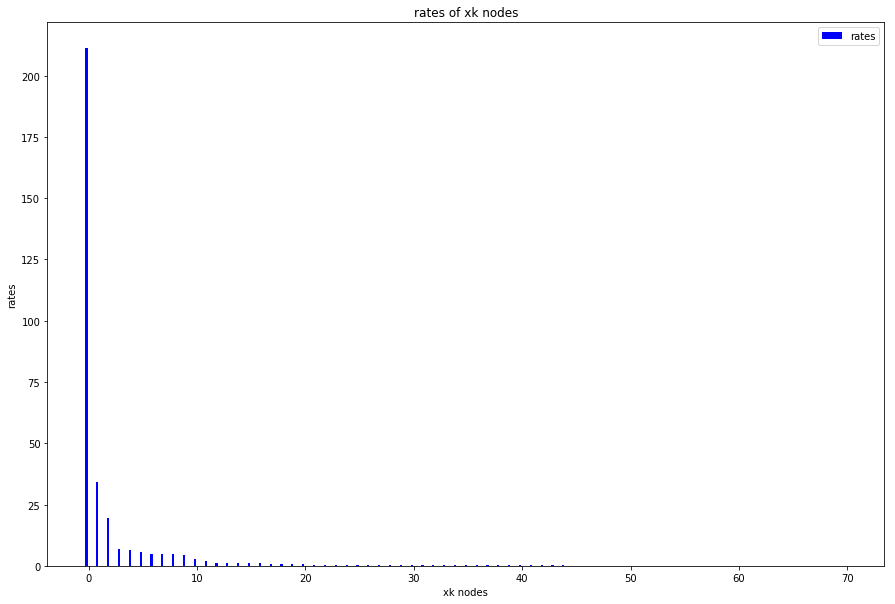

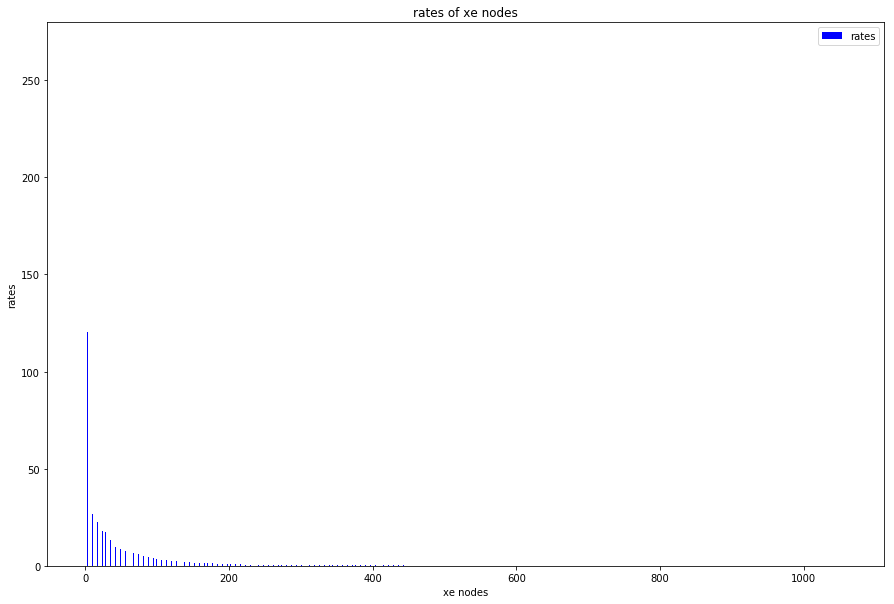

In [26]:
xkxedf=(df.loc[df["Error Type"] == "ECC Error"]).copy()


xe = xkxedf.loc[xkxedf['Node Type'] == "xe"]
xk = xkxedf.loc[xkxedf['Node Type'] == "xk"]
xe_ = xe["Complete Node"].value_counts()
xk_ = xk["Complete Node"].value_counts()
xe_=pd.Series(xe_).where(lambda x : x!=1).dropna()
xk_=pd.Series(xk_).where(lambda x : x!=1).dropna()

lst_xe = xe_.apply(lambda x: (x/64))
lst_xk = xk_.apply(lambda x: (x/32))
# s_xe = pd.Series(lst_xe)
# s_xe = s_xe[s_xe >1]
# s_xk = pd.Series(lst_xk)
# s_xk = s_xk[s_xk >1]

lst_xee = []
lst_xkk = []
lst_xe.apply(lambda x: lst_xee.append(x))
lst_xk.apply(lambda x: lst_xkk.append(x))

ind = np.arange(len(lst_xkk))
fig, ax = plt.subplots(figsize= (15,10))
rects1 = ax.bar(ind-0.2, lst_xkk, 0.2, color='b')
plt.xlabel("xk nodes")
plt.ylabel("rates")
plt.title("rates of xk nodes")
ax.legend(['rates'])
plt.show()

ind2=np.arange(len(lst_xee))
fig, ax = plt.subplots(figsize= (15,10))
rects1 = ax.bar(ind2-0.2, lst_xee, 0.2, color='b')
plt.xlabel("xe nodes")
plt.ylabel("rates")
plt.title("rates of xe nodes")
ax.legend(['rates'])
plt.show()

# 4.How many uncorrectable errors would Blue Waters have if it only used ECC SEC-DED (single bit error correction)?
Blue waters uses an improved version of ECC which can correct multi-bit errors (as seen in your dataset).
How effective is this improved ECC over regular ECC?
Compare the FIT and MTBF (only for uncorrectable errors) considering the same system with regular ECC and improved ECC.
Summarize your answer in 2-3 sentences.

In [27]:
memdf['SEC_DED_UC']=np.where((memdf['error_bits']>1), 1 , 0 )
print (str(int(memdf['SEC_DED_UC'].sum()))+" uncorrectable errors would Blue Waters have if it only used ECC SEC-DED")

11895 uncorrectable errors would Blue Waters have if it only used ECC SEC-DED


In [28]:
SEC_DEC_df1=df.loc[df["Error Type"] != "ECC Error"].copy()
SEC_DEC_df1['SEC_DED_UC']=SEC_DEC_df1['UC']
SEC_DEC_df2=memdf.copy().drop(['Syndrome_hex','hex','error_bits'],axis=1)
result = pd.concat([SEC_DEC_df1,SEC_DEC_df2])

df2=df[df['UC']==1].sort_values(by='Time')

list_time=(df2['Time'].values)[1:] - (df2['Time'].values)[:-1]


print ("improved ECC:")
print ("MTBF="+str(sum(list_time)/len(list_time)/3600)+ " hours")
total_time=(df['Time'].max()-df['Time'].min())/3600
print ("FIT(number of failures in 10^9 hours)="+str(int((10**9*3)/int(total_time))))


df2_SEC=result[result['SEC_DED_UC']==1].sort_values(by='Time')

list_time_SEC=(df2_SEC['Time'].values)[1:] - (df2_SEC['Time'].values)[:-1]

print ("regular ECC SEC-DED:")
print ("MTBF="+str(sum(list_time_SEC)/len(list_time_SEC)/3600) + " hours")
total_time_dec=(result['Time'].max()-result['Time'].min())/3600
print ("FIT(number of failures in 10^9 hours)="+str(int((10**9*len(result[result['SEC_DED_UC']==1]))/int(total_time_dec))))

improved ECC:
MTBF=180.399166667 hours
FIT(number of failures in 10^9 hours)=2156721
regular ECC SEC-DED:
MTBF=0.116899358382 hours
FIT(number of failures in 10^9 hours)=8553558590


# Task 3


* Create a list of dataframe slices, each slice containing entries for a unique node.

* Next, define your Sliding Window Algorithm function such that it returns the number of tuples after coalescing its slice. You should also mark any rows that you will eventually filter out.

* Then, create a ThreadPool and map your algorithm function to the list of dataframe slices

* Run the pool with close/join. The return value of the threadpool map will give you your tuple counts. You just need to sum up this returned list to get the datapoint for your knee curve.

In [29]:
def sliding(df_node):
    W = window_size
    df_node['Coalesced'] = True
    node_first = df_node.iloc[0]
    for i in range(1, len(df_node)):
        if df_node.iloc[i]['Time'] - node_first['Time'] < W:
            df_node.at[i, 'Coalesced'] = False
        else:
            node_first = df_node.iloc[i]
    return df_node['Coalesced'].sum()

In [30]:
data_slices = []
unique_nodes = list(df_sort['Complete Node'].unique())
window_range = range(1,10)

for node in range(len(unique_nodes)):
    data_slices.append(df_sort[df_sort['Complete Node'] == unique_nodes[node]])
    data_slices[node] = data_slices[node].reset_index(drop=True)

# data_slices[3]

In [31]:
# print(sliding(data_slices[1]))
from multiprocessing.pool import ThreadPool

knee_curve = [sum(len(data_slices[i]) for i in range(len(unique_nodes)))]

for window_size in window_range:
    # create a pool with 4 threads (increase or reduce this based on the number of threads your processor supports)
    pool = ThreadPool(4) 
    poolresults = pool.map(sliding, data_slices) # map the square function to inputs
    pool.close()
    pool.join()
    # poolresults contains our returned values
    knee_curve.append(sum(poolresults))


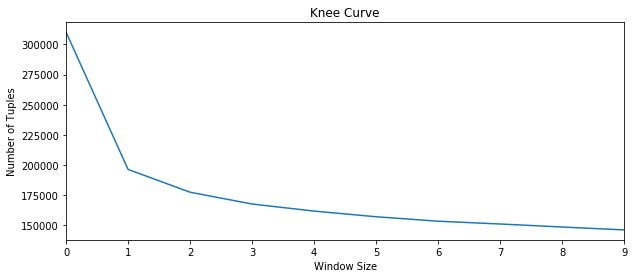

In [32]:
knee_series = pd.Series(knee_curve)
knee_series.plot(figsize=(10,4))
plt.xlabel("Window Size")
plt.ylabel("Number of Tuples")
plt.title("Knee Curve")
plt.show()

In [33]:
window_size = 1

In [34]:
pool = ThreadPool(4) 
poolresults = pool.map(sliding, data_slices) # map the square function to inputs
pool.close()
pool.join()

In [35]:
sum(poolresults)

196323

In [36]:
co_data = pd.concat([data_slices[i][data_slices[i]['Coalesced'] == True] for i in range(len(data_slices))])

In [37]:
co_data = co_data.reset_index(drop=True)
co_data = co_data.drop(['Coalesced'], axis=1)
co_data

,Date Time,Complete Node,Cabinet,Chassis,Slot,Node,Node Type,Processor,Time,Bank,...,Cache way in error,Syndrome,Core,Errorcode,Ext_errorcode,Error Type,Addr,Addr Desc,Errorcode Type,datetime
0,2013-03-04 00:13:22,c18-9c1s1n2,18-9,1.0,1.0,2.0,xe,2:600f12,1.362374e+09,4,...,NaN,'10000,NaN,'100000010011,'1000,ECC Error,2803283d0,Physical,bus,2013-03-04 05:13:23
1,2013-03-04 00:13:22,c18-9c1s1n2,18-9,1.0,1.0,2.0,xe,2:600f12,1.362374e+09,4,...,NaN,'100000,NaN,'100000010011,'1000,ECC Error,28173e010,Physical,bus,2013-03-04 05:13:24
2,2013-03-04 00:13:22,c18-9c1s1n2,18-9,1.0,1.0,2.0,xe,2:600f12,1.362374e+09,4,...,NaN,'100000,NaN,'100000010011,'1000,ECC Error,28173e010,Physical,bus,2013-03-04 05:13:26
3,2013-03-04 00:13:22,c18-9c1s1n2,18-9,1.0,1.0,2.0,xe,2:600f12,1.362374e+09,4,...,NaN,'100000,NaN,'100000010011,'1000,ECC Error,28173e010,Physical,bus,2013-03-04 05:13:28
4,2013-03-04 00:13:22,c18-9c1s1n2,18-9,1.0,1.0,2.0,xe,2:600f12,1.362374e+09,4,...,NaN,'100000,NaN,'100000010011,'1000,ECC Error,28173e010,Physical,bus,2013-03-04 05:13:30
5,2013-03-04 00:13:22,c18-9c1s1n2,18-9,1.0,1.0,2.0,xe,2:600f12,1.362374e+09,4,...,NaN,'100000,NaN,'101000010011,'1000,ECC Error,281f1e210,Physical,bus,2013-03-04 05:13:32
6,2013-03-04 00:13:22,c18-9c1s1n2,18-9,1.0,1.0,2.0,xe,2:600f12,1.362374e+09,4,...,NaN,'100000,NaN,'100000010011,'1000,ECC Error,28173e010,Physical,bus,2013-03-04 05:13:34
7,2013-03-04 00:13:22,c18-9c1s1n2,18-9,1.0,1.0,2.0,xe,2:600f12,1.362374e+09,4,...,NaN,'10000,NaN,'100000010011,'1000,ECC Error,2803283d0,Physical,bus,2013-03-04 05:13:36
8,2013-03-04 01:13:22,c18-9c1s1n2,18-9,1.0,1.0,2.0,xe,2:600f12,1.362378e+09,4,...,NaN,'10001,NaN,'100000010011,'1000,ECC Error,2803283d0,Physical,bus,2013-03-04 06:13:23
9,2013-03-04 01:13:22,c18-9c1s1n2,18-9,1.0,1.0,2.0,xe,2:600f12,1.362378e+09,4,...,NaN,'100000,NaN,'100000010011,'1000,ECC Error,28173e010,Physical,bus,2013-03-04 06:13:25


## Task 3 Task 0

In [38]:
print(min(co_data['datetime']))
print(max(co_data['datetime']))

2013-03-04 05:13:23
2013-05-01 04:58:26


#### Total number of entries

In [39]:
len(co_data)

196323

#### Unique number of nodes

In [40]:
len(co_data['Complete Node'].unique())

6007

In [41]:
# number of days
# normalize() sets the time to 00:00:00 giving us only the date portion of the timestamp/
len(co_data['datetime'].dt.normalize().unique())

59

In [42]:
# node types
co_data['Node Type'].unique()

array(['xe', 'service', 'xk'], dtype=object)

In [43]:
# uncorrectable errors
un_co_data = co_data[(co_data['UC'] ==1)]

un_co_data

,Date Time,Complete Node,Cabinet,Chassis,Slot,Node,Node Type,Processor,Time,Bank,...,Cache way in error,Syndrome,Core,Errorcode,Ext_errorcode,Error Type,Addr,Addr Desc,Errorcode Type,datetime
174982,2013-03-28 07:15:35,c5-3c0s7n3,5-3,0.0,7.0,3.0,xe,2:600f12,1.364473e+09,0,...,'0,NaN,NaN,'110001001,'10000,Tag Error : Tag Array,a7dff0740,Physical,mem,2013-03-28 12:15:35
175102,2013-03-20 21:20:18,c6-4c0s7n3,6-4,0.0,7.0,3.0,xe,2:600f12,1.363832e+09,0,...,'0,NaN,NaN,'110001001,'10000,Tag Error : Tag Array,c58c01e80,Physical,mem,2013-03-21 02:20:18
190646,2013-04-04 22:08:12,c10-1c1s6n0,10-1,1.0,6.0,0.0,xe,2:600f12,1.365131e+09,0,...,'0,NaN,NaN,'110001001,'10000,Tag Error : Tag Array,6180b1a40,Physical,mem,2013-04-05 03:08:12


In [44]:
mcetype = co_data[~pd.isnull(co_data['Errorcode Type'])]
mcetype['Errorcode Type'].unique()

array(['bus', 'mem', 'tlb'], dtype=object)

### Task0.3 Answer: Same as Task 0 above

#### Count the number of MCEs per node. Provide a box plot to summarize your results.
Answer: 6007 complete nodes. Code below with box plot.
We can see there are a lot of outliers and the mean is close to 1, and we total have 6007 complete nodes, there are 4185 nodes only appear once.

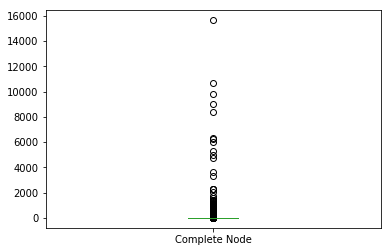

4185


In [45]:
# don't forget to represent this data as a box plot
data = co_data['Complete Node'].value_counts()

df1 = pd.DataFrame(data,columns=['Complete Node'])
df1.plot.box()
plt.show()
d = 0
for i in range(6007):
    if data[i] == 1:
        d = d +1
print(d)

In [46]:
# 5. Compute the mean time between MCEs for:
# 5.1 All nodes together (the whole dataset)
co_sort=co_data.sort_values(by=['Time'])
timevals = co_sort['Time'].values
diffs = timevals[1:] - timevals[:-1]
print ("For the whole dataset, the mean time is: "+str(diffs.mean() ))
print ("For the whole dataset, the std is: "+str(diffs.std() ))


# 5.2 Each of the node types (i.e. XE, XK, etc)
list1=co_data['Node Type'].unique()
for item in list1:
    grouped=co_data.groupby(['Node Type']).get_group(item)
    grouped_sort=grouped.sort_values(by=['Time'])
    timevals_xe = grouped_sort['Time'].values
    diffs_xe = timevals_xe[1:] - timevals_xe[:-1]
    print ("for "+item+" the mean time is: "+str(diffs_xe.mean() ))
    print ("for "+item+" the std is: "+str(diffs_xe.std() )  )

For the whole dataset, the mean time is: 25.5208433084
For the whole dataset, the std is: 145.623190549
for xe the mean time is: 28.3276021937
for xe the std is: 155.045637171
for service the mean time is: 522.002922451
for service the std is: 2173.71648709
for xk the mean time is: 506.962002229
for xk the std is: 1776.89957744


## Task 3 Task 1

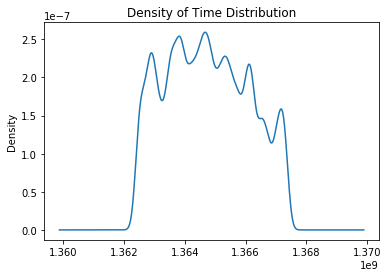

In [47]:
from pandas import Series

df_1=co_data.sort_values(by=['Time'])['Time']
df_1.plot(kind='kde',title="Density of Time Distribution")
plt.show()

29478 2013-03-16 03:45:38 2013-03-15 19:34:20
8089 2013-04-18 16:10:13 2013-04-18 13:55:24
21444 2013-04-22 16:25:32 2013-04-22 10:28:08
46795 2013-04-25 02:25:39 2013-04-24 13:25:44


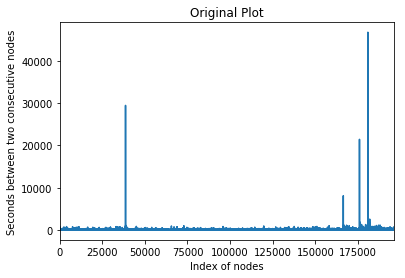

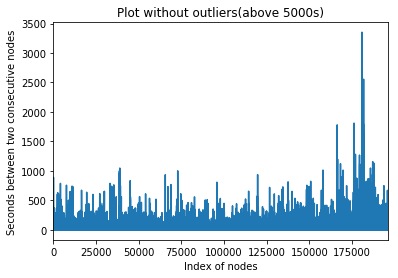

In [48]:
start = ((co_data['datetime'].sort_values())[:-1])
end = (co_data['datetime'].sort_values())[1:]
start = list(start)
end= list(end)
dif = []
extra = []

for i in range(len(start)):
    a = ((end[i]-start[i]).seconds)
    dif.append(a)
    extra.append(a)
    if (a > 5000):
        print(a,end[i],start[i])
        extra.pop()


ts = pd.Series(dif)
ts.plot()
plt.ylabel("Seconds between two consecutive nodes")
plt.xlabel("Index of nodes")
plt.title("Original Plot")
plt.show()



after = pd.Series(extra)
after.plot()
plt.ylabel("Seconds between two consecutive nodes")
plt.xlabel("Index of nodes")
plt.title("Plot without outliers(above 5000s)")
plt.show()

### What percentage of MCEs is due to memory errors?

In [49]:
df_task1_2 = co_data.loc[(co_data['Errorcode Type'] == "mem")]
mem_err = len(df_task1_2)
total = len(co_data)
print(mem_err/total)

0.31514901463404693


### Provide a breakdown of the number, type (e.g., ECC, L1, L2, memory) and % of machine check for the entire dataset and per node type.
Construct a bar chart to visualize your results.

D:\Applications\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


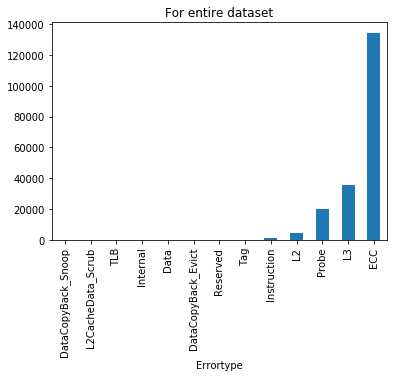

In [50]:
new_errortype=[]
for item in co_data['Error Type']:
    new_errortype.append(str(item).split()[0])
co_data['Errortype']=new_errortype

entire_count=co_data[co_data['Errortype'] != 'nan'].groupby('Errortype').datetime.agg({'sum':'count'})
entire_count['percentage']=entire_count['sum']/co_data.shape[0]
x=entire_count['sum'].sort_values()
x.plot(kind='bar',title="For entire dataset")
plt.show()

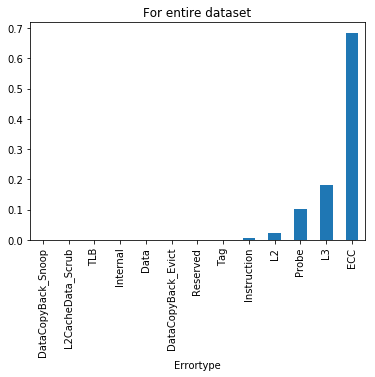

In [51]:
x=entire_count['percentage'].sort_values()
x.plot(kind='bar',title="For entire dataset")
plt.show()

D:\Applications\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


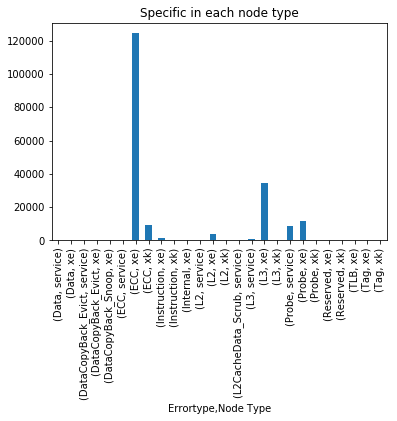

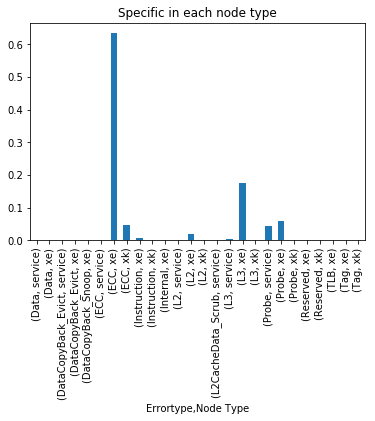

In [52]:
node_count=co_data[co_data['Errortype'] != 'nan'].groupby(['Errortype','Node Type']).datetime.agg({'sum':'count'})
# node_counts = node_count.groupby(level=0).apply(lambda x: x / float(x.sum()))
node_count['Ratio']=node_count['sum']/co_data.shape[0]
x=node_count['sum']
x.plot(kind='bar',title="Specific in each node type")
plt.show()
plt.figure()
x=node_count['Ratio']
x.plot(kind='bar',title="Specific in each node type")
plt.show()

Yes, there are three uncorrectable errors for the given amount of time
The histogram for TBF for uncorrectable errors: 


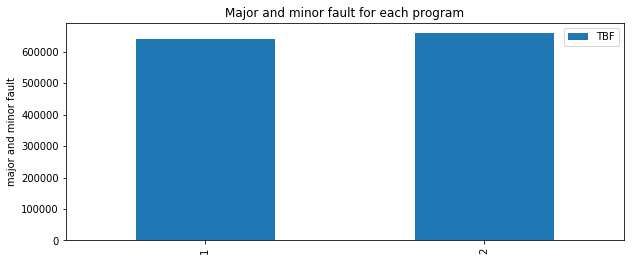

MTBF=180.399166667 hours
FIT(number of failures in 10^9 hours)=2155558


In [53]:

print ("Yes, there are three uncorrectable errors for the given amount of time")
print ("The histogram for TBF for uncorrectable errors: ")

df2=co_data[co_data['UC']==1].sort_values(by='Time')

list_time=(df2['Time'].values)[1:] - (df2['Time'].values)[:-1]

dff = pd.DataFrame(list_time,
                 index=[1,2],
                 columns=pd.Index(['TBF']
                 )).round(2)
dff.plot(kind='bar',figsize=(10,4))
plt.ylabel("major and minor fault")
plt.title("Major and minor fault for each program")
plt.show()

print ("MTBF="+str(sum(list_time)/2/3600)+" hours")
total_time=(co_data['Time'].max()-co_data['Time'].min())/3600
print ("FIT(number of failures in 10^9 hours)="+str(int((3 * 10**9)/total_time)))

## Task 3 Task 2

#### task2.1

In [54]:
memdf=(co_data.loc[co_data["Error Type"] == "ECC Error"]).copy()


#append the hex form(ep.0x10) to memdf    
memdf['Syndrome_hex']=memdf['Syndrome'].apply(lambda x: ( hex(int((''.join(str(x))[1:]),2))))

#create 4 bit hex number into "hex" column
memdf['hex'] = memdf['Syndrome_hex'].apply(lambda x: ((x.lstrip("0x")).zfill(4)).upper())

x8 = pd.read_table("syndrome_x8.txt", sep=' ', index_col='00')

#build dictionary to contain all the value and row number in table x8
header = list(x8)
ind = list(x8.index)
dic = {}
for j in header:
    for i in range (len(x8[j])):
        dic[(x8[j])[i]] = ind[i]
len(dic.keys())

#check if the syndrome number in table x8
listhex=memdf['hex']
row_num=[]
       
def f(item):
    if (dic.get(item) == None):
        return 0
    return (str(bin(int(dic[item], 16)))[2:]).count("1")
memdf['error_bits'] = memdf['hex'].apply(lambda x: f(x))


values = memdf['error_bits'].value_counts()    

#remove rows with more than 4 error bits
df1234 = memdf[memdf['error_bits'] != 5 ]
df1234 = df1234[df1234['error_bits'] != 6 ]
df1234 = df1234[df1234['error_bits'] != 7 ]
df1234 = df1234[df1234['error_bits'] != 0 ]
df1234 = df1234[df1234['error_bits'] != 8 ]
dfne=df1234[['Node Type','error_bits']]
df_xe = dfne[dfne['Node Type'] == 'xe' ]
dfxe=df_xe.groupby(['error_bits']).count()
df_xk = dfne[dfne['Node Type'] == 'xk' ]
dfxk=df_xk.groupby(['error_bits']).count()
df_se = dfne[dfne['Node Type'] == 'service' ]
dfse=df_se.groupby(['error_bits']).count()
frames = [dfxk,dfxe,dfse]
result = pd.concat(frames,axis=1, join='outer')
result.columns=['xk','xe','service']
result

,xk,xe,service
error_bits,,,
1,5685,118669,406.0
2,3268,2832,1.0
3,458,1203,NaN
4,141,780,NaN


#### task2.2

[6101, 1661, 921, 559, 265, 105, 18] [2, 3, 4, 5, 6, 7, 8]


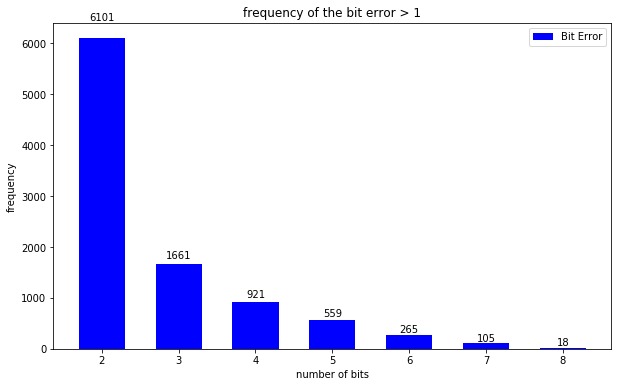

In [55]:
#count ones by change it to string and apply lambda function
myarray = list((values.index).sort_values())
lst = []
for i in range(len(values)):
    lst.append(values[i])

# data cleaning
del(lst[0])
del(lst[0])
del(myarray[0])
del(myarray[0])
print(lst , myarray)

fig, ax = plt.subplots(figsize= (10,6))
rects1 = ax.bar(myarray, lst, 0.6, color='b')
plt.xlabel("number of bits")
plt.ylabel("frequency")
plt.title("frequency of the bit error > 1")
ax.set_xticks(np.asarray(myarray))
ax.legend(['Bit Error'])

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
plt.show()

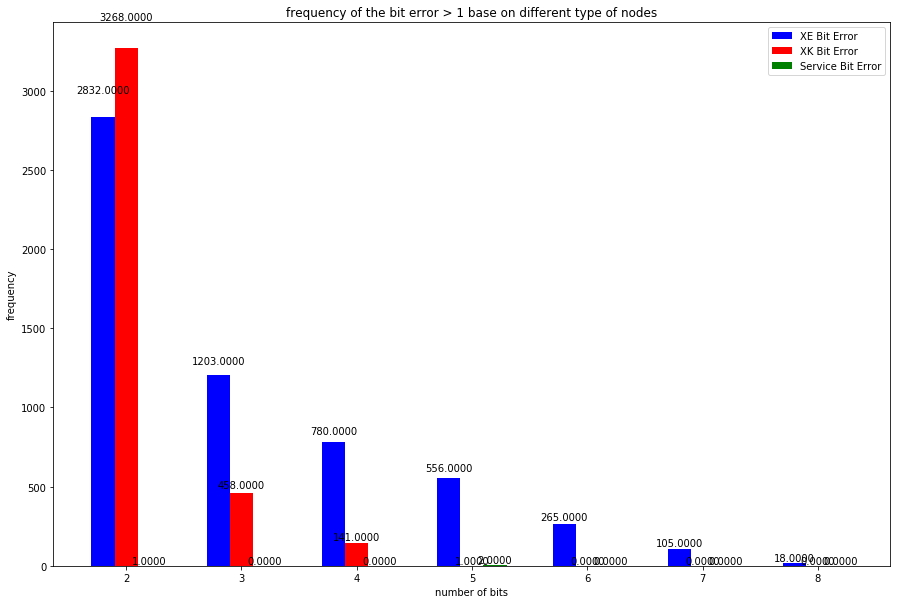

In [56]:
from numpy import linalg as la
#count ones by change it to string and apply lambda function
#df['decode'] = df['Syndrome'].apply(lambda x: str(x).count('1'))
#myarray = list(((df['decode'].value_counts()).index).sort_values())

xe = memdf.loc[memdf['Node Type'] == "xe"]
xk = memdf.loc[memdf['Node Type'] == "xk"]
service = memdf.loc[memdf['Node Type'] == "service"]
xe_values = xe['error_bits'].value_counts()
xk_values = xk['error_bits'].value_counts()
service_values = service['error_bits'].value_counts()
xe_sort = list((xe_values.index).sort_values())
xk_sort = list((xk_values.index).sort_values())
service_sort = list(((service_values).index).sort_values())

lst_xe = []
lst_xk = []
lst_service = []
# print(service_values,service_sort)
# # print(xe)
for i in myarray:
    if i in xe_sort:
        lst_xe.append(xe_values[i])
    else:
        lst_xe.append(0)
    
    if i in xk_sort:
        lst_xk.append(xk_values[i])
    else:
        lst_xk.append(0)
    
    if i in service_sort:
        lst_service.append(service_values[i])
    else:
        lst_service.append(0)

ind = np.arange(2,len(myarray)+2,1)
fig, ax = plt.subplots(figsize= (15,10))
rects1 = ax.bar(ind-0.2, lst_xe, 0.2, color='b')
rects2 = ax.bar(ind, lst_xk, 0.2, color='r')
rects3 = ax.bar(ind+0.2, lst_service, 0.2, color='g')
plt.xlabel("number of bits")
plt.ylabel("frequency")
plt.title("frequency of the bit error > 1 base on different type of nodes")
ax.set_xticks(np.asarray(myarray))
ax.legend(['XE Bit Error','XK Bit Error', 'Service Bit Error'])

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%.4f' % round(float(height),4),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
plt.show()

#### task2.3

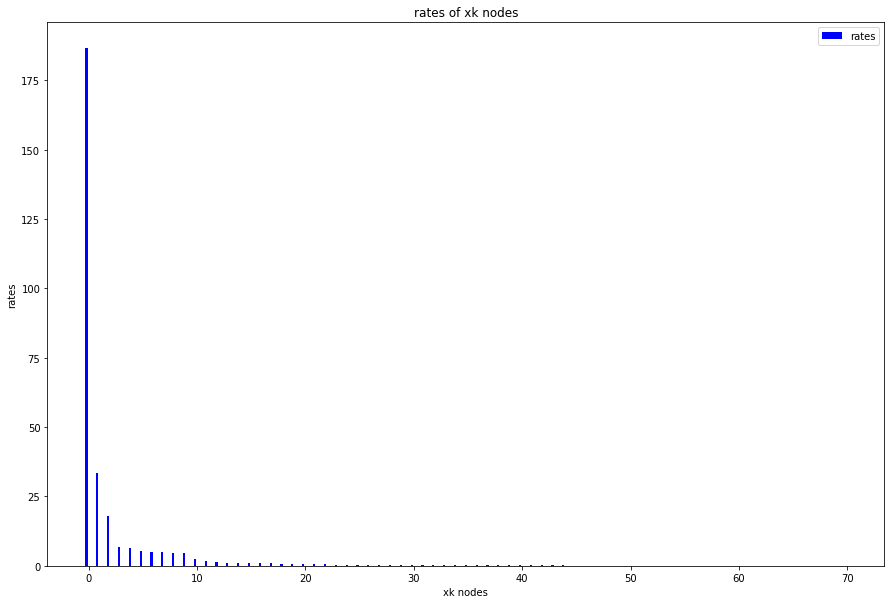

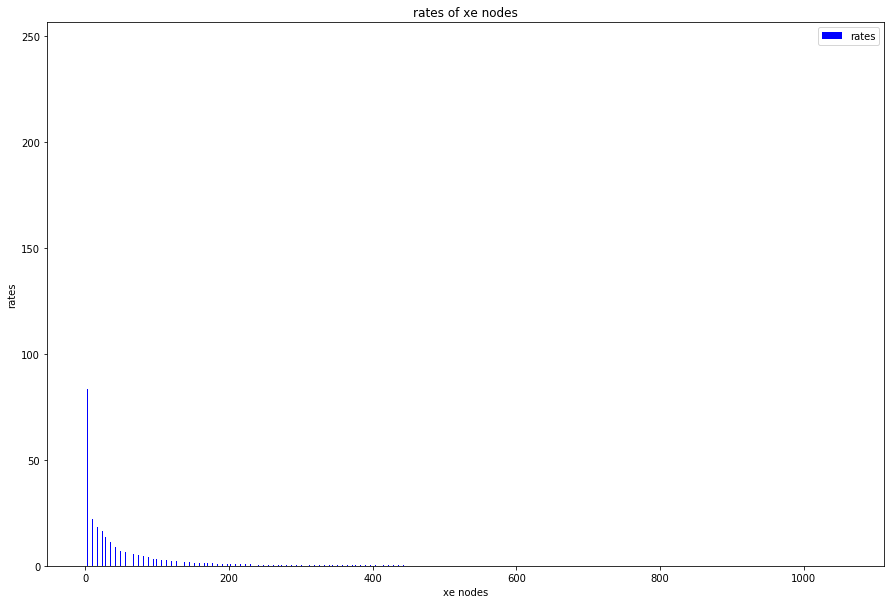

In [57]:
xkxedf=(co_data.loc[co_data["Error Type"] == "ECC Error"]).copy()


xe = xkxedf.loc[xkxedf['Node Type'] == "xe"]
xk = xkxedf.loc[xkxedf['Node Type'] == "xk"]
xe_ = xe["Complete Node"].value_counts()
xk_ = xk["Complete Node"].value_counts()
xe_=pd.Series(xe_).where(lambda x : x!=1).dropna()
xk_=pd.Series(xk_).where(lambda x : x!=1).dropna()

lst_xe = xe_.apply(lambda x: (x/64))
lst_xk = xk_.apply(lambda x: (x/32))
# s_xe = pd.Series(lst_xe)
# s_xe = s_xe[s_xe >1]
# s_xk = pd.Series(lst_xk)
# s_xk = s_xk[s_xk >1]

lst_xee = []
lst_xkk = []
lst_xe.apply(lambda x: lst_xee.append(x))
lst_xk.apply(lambda x: lst_xkk.append(x))

ind = np.arange(len(lst_xkk))
fig, ax = plt.subplots(figsize= (15,10))
rects1 = ax.bar(ind-0.2, lst_xkk, 0.2, color='b')
plt.xlabel("xk nodes")
plt.ylabel("rates")
plt.title("rates of xk nodes")
ax.legend(['rates'])
plt.show()

ind2=np.arange(len(lst_xee))
fig, ax = plt.subplots(figsize= (15,10))
rects1 = ax.bar(ind2-0.2, lst_xee, 0.2, color='b')
plt.xlabel("xe nodes")
plt.ylabel("rates")
plt.title("rates of xe nodes")
ax.legend(['rates'])
plt.show()

#### task2.4

In [58]:
memdf['SEC_DED_UC']=np.where((memdf['error_bits']>1), 1 , 0 )
print (str(int(memdf['SEC_DED_UC'].sum()))+" uncorrectable errors would Blue Waters have if it only used ECC SEC-DED")

9630 uncorrectable errors would Blue Waters have if it only used ECC SEC-DED


In [59]:
SEC_DEC_df1=co_data.loc[co_data["Error Type"] != "ECC Error"].copy()
SEC_DEC_df1['SEC_DED_UC']=SEC_DEC_df1['UC']
SEC_DEC_df2=memdf.copy().drop(['Syndrome_hex','hex','error_bits'],axis=1)
result = pd.concat([SEC_DEC_df1,SEC_DEC_df2])


df2=co_data[co_data['UC']==1]
min_downtime=df2['Time'].min()
max_downtime=df2['Time'].max()
TBF=(max_downtime-min_downtime)/3600

print ("improved ECC:")
print ("MTBF="+str(TBF/3))
total_time=(co_data['Time'].max()-co_data['Time'].min())/3600
print ("FIT(number of failures in 10^9 hours)="+str(int((10**9*3)/int(total_time))))

df2_SEC=result[result['SEC_DED_UC']==1]
min_downtime_dec=df2_SEC['Time'].min()
max_downtime_dec=df2_SEC['Time'].max()
TBF_dec=(max_downtime_dec-min_downtime_dec)/3600
count_dec=result[result['SEC_DED_UC']==1].shape[0]

print ("regular ECC:")
print ("MTBF="+str(TBF_dec/count_dec)+" hours")
total_time_dec=(result['Time'].max()-result['Time'].min())/3600
print ("FIT(number of failures in 10^9 hours)="+str(int((10**9*count_dec)/int(total_time_dec))))

improved ECC:
MTBF=120.266111111
FIT(number of failures in 10^9 hours)=2156721
regular ECC:
MTBF=0.144291324959 hours
FIT(number of failures in 10^9 hours)=6925233644


#### Task3 Independence Test

In [70]:
def foo(x):
    if (x == "ECC Error"):
        return 1
    else:
        return 0
    
co_data['isMem'] = co_data['Error Type'].apply(lambda x: foo(x))
# print(co_data['isMem'])
#memdf['Syndrome_hex']=memdf['Syndrome'].apply(lambda x: ( hex(int((''.join(str(x))[1:]),2))))
# print(list(co_data['Chassis']))
a = list(co_data['Chassis'])
b = list(co_data['isMem'])


In [73]:
from scipy import stats
t2, p2 = stats.ttest_ind(a,b)
print("t = " + str(t2))
print("p = " + str(2*p2))


t = 222.253967895
p = 0.0


# Task 4

In [74]:
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD

# Defining the model structure. We can define the network by just passing a list of edges.
model = BayesianModel([('MCE', 'OS'), ('MCE', 'APP'), ('OS', 'APP')])

network = pd.read_csv("task4_group1.csv", sep='\t')
print('Total entries: ' + str(len(network)))

Total entries: 10000


In [75]:
model.fit(network)
model.check_model()

True

In [76]:
print(model.get_cpds('MCE'))
print(model.get_cpds('OS'))
print(model.get_cpds('APP'))


╒════════╤════════╕
│ MCE(C) │ 0.7009 │
├────────┼────────┤
│ MCE(P) │ 0.1486 │
├────────┼────────┤
│ MCE(U) │ 0.1505 │
╘════════╧════════╛
╒═══════╤══════════════════════╤═════════════════════╤════════════════════╕
│ MCE   │ MCE(C)               │ MCE(P)              │ MCE(U)             │
├───────┼──────────────────────┼─────────────────────┼────────────────────┤
│ OS(R) │ 0.9707518904265944   │ 0.5134589502018843  │ 0.0053156146179402 │
├───────┼──────────────────────┼─────────────────────┼────────────────────┤
│ OS(X) │ 0.029248109573405623 │ 0.48654104979811574 │ 0.9946843853820598 │
╘═══════╧══════════════════════╧═════════════════════╧════════════════════╛
╒════════╤═════════════════════╤═════════════════════╤═════════════════════╤══════════════════════╤════════╤══════════════════════╕
│ MCE    │ MCE(C)              │ MCE(C)              │ MCE(P)              │ MCE(P)               │ MCE(U) │ MCE(U)               │
├────────┼─────────────────────┼─────────────────────┼──────────

In [77]:
from pgmpy.inference import VariableElimination
infer = VariableElimination(model)
print(infer.query(['MCE']) ['MCE'])
print('0:C    1:P    2:U')
print(infer.query(['OS']) ['OS'])
print('0:R    1:X')
print(infer.query(['APP']) ['APP'])
print('0:F    1:R')
# infer.map_query('G', evidence={'D': 0, 'I': 1})

╒═══════╤════════════╕
│ MCE   │   phi(MCE) │
╞═══════╪════════════╡
│ MCE_0 │     0.7009 │
├───────┼────────────┤
│ MCE_1 │     0.1486 │
├───────┼────────────┤
│ MCE_2 │     0.1505 │
╘═══════╧════════════╛
0:C    1:P    2:U
╒══════╤═══════════╕
│ OS   │   phi(OS) │
╞══════╪═══════════╡
│ OS_0 │    0.7575 │
├──────┼───────────┤
│ OS_1 │    0.2425 │
╘══════╧═══════════╛
0:R    1:X
╒═══════╤════════════╕
│ APP   │   phi(APP) │
╞═══════╪════════════╡
│ APP_0 │     0.2884 │
├───────┼────────────┤
│ APP_1 │     0.7116 │
╘═══════╧════════════╛
0:F    1:R


### Given that an application has failed, calculate the probabilities of each possible hypothesis. Apply the MAP decision rule to your hypotheses.

In [78]:
hypotheses = infer.query(['MCE','OS'], evidence={'APP': 0})

In [79]:
print(hypotheses['MCE'])

╒═══════╤════════════╕
│ MCE   │   phi(MCE) │
╞═══════╪════════════╡
│ MCE_0 │     0.1904 │
├───────┼────────────┤
│ MCE_1 │     0.2926 │
├───────┼────────────┤
│ MCE_2 │     0.5170 │
╘═══════╧════════════╛


In [80]:
print(hypotheses['OS'])

╒══════╤═══════════╕
│ OS   │   phi(OS) │
╞══════╪═══════════╡
│ OS_0 │    0.1803 │
├──────┼───────────┤
│ OS_1 │    0.8197 │
╘══════╧═══════════╛


#### Given that an app has failed, the most likely reason is that the OS has crashed

### Given each of the 4 cases below, are applications more likely to fail or continue running?

##### MCE = ‘C’, OS = ‘X’

In [81]:
state = 'fail' if infer.map_query(['APP'], evidence={'MCE': 0, 'OS': 1})['APP'] == 0 else 'continue running'
print('Application likely to ' + state)

Application likely to fail


##### MCE = ‘P’, OS = ‘R’

In [82]:
state = 'fail' if infer.map_query(['APP'], evidence={'MCE': 1, 'OS': 0})['APP'] == 0 else 'continue running'
print('Application likely to ' + state)

Application likely to continue running


##### MCE = ‘U’, OS = ‘R’


In [83]:
state = 'fail' if infer.map_query(['APP'], evidence={'MCE': 2, 'OS': 0})['APP'] == 0 else 'continue running'
print('Application likely to ' + state)

Application likely to fail


##### MCE = ‘U’, OS = ‘X’

In [84]:
state = 'fail' if infer.map_query(['APP'], evidence={'MCE': 2, 'OS': 1})['APP'] == 0 else 'continue running'
print('Application likely to ' + state)

Application likely to fail
